<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/Bivariate%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# y 변수가 2개인 경우를 다루어보자 (duopoly 시장의 균형가격 찾기).

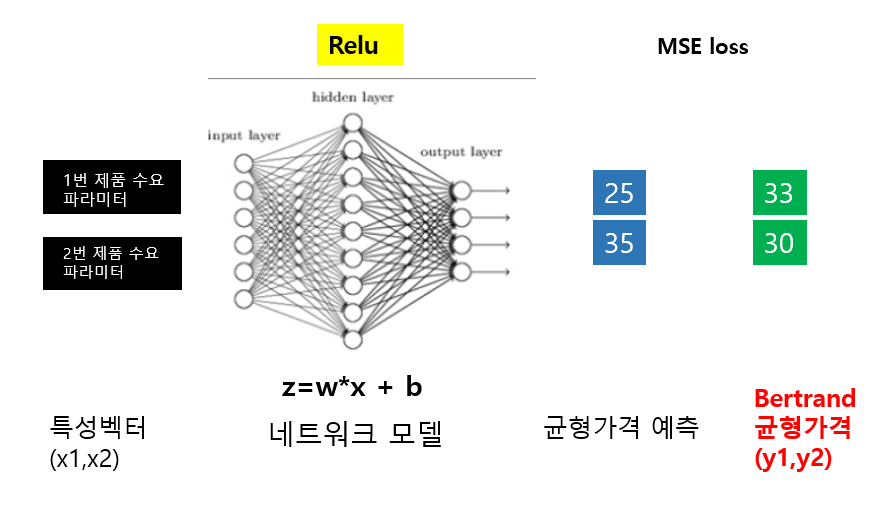

## 데이터를 불러오자

In [1]:
#copy.right Hongjai Rhee

## 필요한 라이브러리 불러오기
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals; import pathlib; import seaborn as sns 
from keras.models import Sequential; from keras.layers import Dense, Dropout, Activation; import pandas as pd;  import numpy as np
from sklearn.model_selection import train_test_split; from keras.utils.np_utils import to_categorical; from matplotlib import style
!git clone https://github.com/hongjai-rhee/public.git


Using TensorFlow backend.


Cloning into 'public'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 568 (delta 8), reused 24 (delta 5), pack-reused 537
Receiving objects: 100% (568/568), 65.75 MiB | 37.22 MiB/s, done.
Resolving deltas: 100% (282/282), done.


In [2]:
## 데이터 불러오기  
dat = pd.read_csv('/content/public/bert.csv', encoding='cp949')
dat.head(10)     ## p0, p1 이 y변수

,v0,v1,theta,c0,c1,p0,p1
0,4638,3359,0.5,10,9,-416.166667,436.166667
1,4002,3467,0.5,8,10,-169.166667,188.166667
2,4692,3407,0.5,5,7,-422.166667,435.166667
3,4762,4077,0.5,9,6,-219.833333,235.833333
4,3491,3173,0.5,7,6,-98.833333,112.833333
5,3953,4871,0.5,7,7,313.500000,-298.500000
6,3128,3438,0.5,7,8,111.166667,-95.166667
7,3662,4409,0.5,5,9,255.833333,-240.833333
8,4755,4127,0.5,9,7,-200.500000,217.500000
9,4831,4436,0.5,9,8,-122.500000,140.500000


In [3]:
dat = np.array(dat); ncol=dat.shape[1]; nrow=dat.shape[0]
x=dat[:,0:5]; y=dat[:,5:7]; ## 월매출은 로그 스케일로 변환
print(x.shape, y.shape)
y[0]

(2000, 5) (2000, 2)


array([-416.1666667,  436.1666667])

# 네트워크 구조와 학습횟수를 정하자

In [0]:
## 학습 파라미터 설정
hidden_neuron=0      ## 은닉층(1개)의 뉴론 수 (은닉층 없으면 0으로 설정)
EPOCH=500; BATCH=32  ## 학습횟수 

# 학습을 실행한다








Train on 1600 samples, validate on 400 samples
Epoch 1/500





 - 1s - loss: 26515849.3600 - mean_squared_error: 26515849.3600 - val_loss: 24333118.8800 - val_mean_squared_error: 24333118.8800
Epoch 2/500
 - 0s - loss: 22626170.4400 - mean_squared_error: 22626170.4400 - val_loss: 20691888.6400 - val_mean_squared_error: 20691888.6400
Epoch 3/500
 - 0s - loss: 19204939.8400 - mean_squared_error: 19204939.8400 - val_loss: 17507678.2400 - val_mean_squared_error: 17507678.2400
Epoch 4/500
 - 0s - loss: 16206578.7400 - mean_squared_error: 16206578.7400 - val_loss: 14721408.4800 - val_mean_squared_error: 14721408.4800
Epoch 5/500
 - 0s - loss: 13590074.5800 - mean_squared_error: 13590074.5800 - val_loss: 12294201.2800 - val_mean_squared_error: 12294201.2800
Epoch 6/500
 - 0s - loss: 11320781.4000 - mean_squared_error: 11320781.4000 - val_loss: 10195231.1600 - val_mean_squared_error: 10195231.1600
Epoch 7/500
 - 0s - loss: 9366176.6900 - mean_squared_error: 9366176.6900 - val_loss: 839

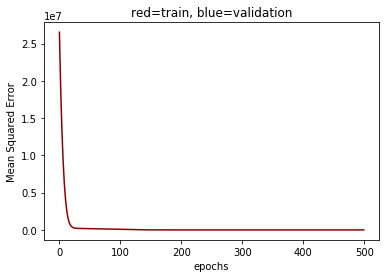

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [5]:


#### 이 아래는 자동으로 실행됨

## 2. 학습/검증 데이터 나누기  (80-20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)

## 3. 모델만들기
if hidden_neuron ==0: 
    model = Sequential()
    model.add(Dense(2, input_dim=x_train.shape[1]))   ## 은닉층=0
else: 
    model = Sequential()
    model.add(Dense(hidden_neuron, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(2)) ## 은닉층=1

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(x_train, y_train, epochs = EPOCH, batch_size=BATCH, validation_data=(x_test, y_test), verbose = 2)
model.summary()

from sklearn.metrics import r2_score; import matplotlib.pyplot as plt


# model fit 그림으로 표시
plt.plot(range(EPOCH), hist.history['mean_squared_error'], label='Training Mean Squared Error', color='darkred')
#plt.plot(range(EPOCH), hist.history['val_mean_squared_error'], label='Validation Mean Squared Error', color='darkblue')
plt.xlabel('epochs'); plt.ylabel('Mean Squared Error'); plt.title('red=train, blue=validation'); plt.show()
model.summary()
pred_y = model.predict(x_test)


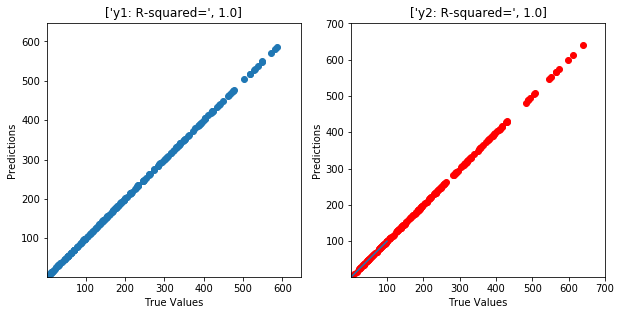

In [8]:

r21=r2_score(y_test[:,0], pred_y[:,0])
r22=r2_score(y_test[:,1], pred_y[:,1])
#print(r21, r22)

## 두 y변수의  테스트 셋에 대한 예측결과 시각화
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.scatter(y_test[:,0], pred_y[:,0]);plt.xlabel('True Values');plt.ylabel('Predictions');plt.axis('equal');plt.axis('square'); plt.title(["y1: R-squared=", np.round(r21,3)])
plt.xlim([2,plt.xlim()[1]]);plt.ylim([2,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.subplot(1,2,2)

plt.scatter(y_test[:,1], pred_y[:,1],color='red');plt.xlabel('True Values');plt.ylabel('Predictions');plt.axis('equal');plt.axis('square'); plt.title(["y2: R-squared=", np.round(r22,3)])
plt.xlim([2,plt.xlim()[1]]);plt.ylim([2,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

**45도 선에 위치할수록 테스트셋에 대한 예측이 정확하게 된 것이**다



# 예측하기


In [11]:
# 6. 예측하기 
x_new= x_test[0:10]; 
#print(np.round(x_new,2)); 
yhat = model.predict(x_new)
print(np.round(yhat,2))
## EOF

[[ 145.36 -132.12]
 [  90.93  -70.44]
 [ 128.14 -112.78]
 [ 527.75 -510.46]
 [ -18.87   34.22]
 [ 247.52 -229.11]
 [ 213.86 -198.44]
 [ 352.64 -339.46]
 [-106.89  124.21]
 [ -92.49  108.89]]
